<a href="https://colab.research.google.com/github/Phaneesh-Katti/Chest-Xray-CNN/blob/main/Final-CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up Kaggle



In [ ]:
! pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 2.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=bfd81fa8174a21ea7720f86f14f61790da4f371a732074e54fbdffe97d00b881
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.10
    Uninstalling kaggle-1.5.10:
      Successfully uninstalled kaggle-1.5.10


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"phaneeshkatti","key":"0031f5dbca97db0c1f6b67a3510f07ad"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/ 

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets list

In [ ]:
! kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

 99% 2.28G/2.29G [00:28<00:00, 125MB/s]
100% 2.29G/2.29G [00:28<00:00, 85.7MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip -d dataset

# CNN Model without Transfer Learning (TL) or Data Augmentation (DA)






In [ ]:
from tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
training_path = "/content/dataset/chest_xray/chest_xray/train"
testing_path = "/content/dataset/chest_xray/chest_xray/test"

In [ ]:
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    training_path,
    image_size = (200,200),
    batch_size = 32
)

Found 5216 files belonging to 2 classes.


In [ ]:
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    testing_path,
    image_size = (200,200),
    batch_size = 32
)

Found 624 files belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential()

# Feature Extraction part
model.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200, 200, 3)))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))
model.add(tf.keras.layers.MaxPool2D(2,2))
model.add(tf.keras.layers.Conv2D(64, (3, 3), activation= 'relu'))

# Neural Network - For classification
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
                 loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
                 metrics = ['accuracy'])

In [ ]:
history = model.fit(train_dataset, validation_data=test_dataset, epochs = 30)

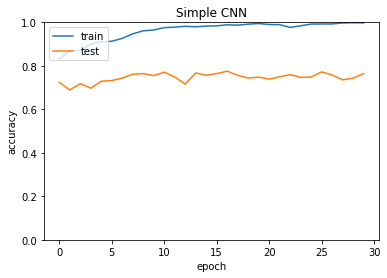

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Simple CNN')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.ylim([0,1])
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Data Augmentation


In [ ]:
#ImageDataGenerator
dataGen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    width_shift_range=0.3,
    height_shift_range=0.3,
    zoom_range=[0.5,1.5],
)

In [ ]:
train_dataset_aug = dataGen.flow_from_directory(
    training_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 420
)

Found 5216 images belonging to 2 classes.


In [ ]:
test_dataset_aug = dataGen.flow_from_directory(
    testing_path,
    target_size = (200,200),
    batch_size = 32,
    shuffle=True,
    seed = 420
)

Found 624 images belonging to 2 classes.


In [ ]:
DAmodel = tf.keras.models.Sequential()

# Feature extraction part
DAmodel.add(tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(200,200,3)))
DAmodel.add(tf.keras.layers.MaxPooling2D((2,2)))
DAmodel.add(tf.keras.layers.Conv2D(64, (3,3), activation='relu'))
DAmodel.add(tf.keras.layers.MaxPooling2D((2,2)))
DAmodel.add(tf.keras.layers.Conv2D(64,(3,3), activation='relu'))

# Neural network - For classification
DAmodel.add(tf.keras.layers.Flatten())
DAmodel.add(tf.keras.layers.Dense(32, activation='relu'))
DAmodel.add(tf.keras.layers.Dense(64, activation='relu'))
DAmodel.add(tf.keras.layers.Dense(2, activation='softmax'))

#Compile
DAmodel.compile(optimizer = 'adam',
                loss='categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
history2 = DAmodel.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 30)

Epoch 1/30
163/163 [==============================] - 98s 600ms/step - loss: 0.5625 - accuracy: 0.7244 - val_loss: 0.5725 - val_accuracy: 0.7340
Epoch 2/30
163/163 [==============================] - 98s 603ms/step - loss: 0.4030 - accuracy: 0.8153 - val_loss: 0.6234 - val_accuracy: 0.7372
Epoch 3/30
163/163 [==============================] - 99s 605ms/step - loss: 0.3670 - accuracy: 0.8355 - val_loss: 0.5569 - val_accuracy: 0.7660
Epoch 4/30
163/163 [==============================] - 99s 610ms/step - loss: 0.3256 - accuracy: 0.8479 - val_loss: 0.7490 - val_accuracy: 0.7179
Epoch 5/30
163/163 [==============================] - 99s 605ms/step - loss: 0.3226 - accuracy: 0.8569 - val_loss: 0.5388 - val_accuracy: 0.8109
Epoch 6/30
163/163 [==============================] - 99s 609ms/step - loss: 0.2781 - accuracy: 0.8743 - val_loss: 0.6644 - val_accuracy: 0.7163
Epoch 7/30
163/163 [==============================] - 99s 609ms/step - loss: 0.2687 - accuracy: 0.8842 - val_loss: 0.5636 - val_ac

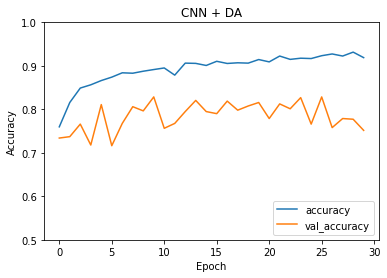

In [ ]:
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('CNN(DA)')
plt.ylim([0.65, 1])
plt.legend(loc='lower right')

# Tranfer Learning with data augmentation

In [ ]:
pretrained_model = tf.keras.applications.InceptionResNetV2(input_shape=(200,200,3),
                                               include_top=False,
                                               weights='imagenet')

In [ ]:
TLmodel = tf.keras.models.Sequential()

TLmodel.add(pretrained_model)

TLmodel.add(tf.keras.layers.GlobalAveragePooling2D())

TLmodel.add(tf.keras.layers.Dense(1024, activation='relu'))
TLmodel.add(tf.keras.layers.Dense(512, activation='relu'))
TLmodel.add(tf.keras.layers.Dense(2, activation='softmax'))

TLmodel.compile(optimizer = 'adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

In [ ]:
# With Data Augmentation
history3 = TLmodel.fit(train_dataset_aug, validation_data=test_dataset_aug, epochs = 30)

Epoch 1/30
163/163 [==============================] - 149s 837ms/step - loss: 0.7136 - accuracy: 0.7934 - val_loss: 0.4837 - val_accuracy: 0.7772
Epoch 2/30
163/163 [==============================] - 132s 810ms/step - loss: 0.3382 - accuracy: 0.8457 - val_loss: 0.4227 - val_accuracy: 0.8269
Epoch 3/30
163/163 [==============================] - 132s 808ms/step - loss: 0.2454 - accuracy: 0.8950 - val_loss: 0.4340 - val_accuracy: 0.8077
Epoch 4/30
163/163 [==============================] - 132s 809ms/step - loss: 0.2237 - accuracy: 0.9099 - val_loss: 0.5482 - val_accuracy: 0.7901
Epoch 5/30
163/163 [==============================] - 132s 807ms/step - loss: 0.2498 - accuracy: 0.8974 - val_loss: 0.4055 - val_accuracy: 0.8365
Epoch 6/30
163/163 [==============================] - 132s 806ms/step - loss: 0.2298 - accuracy: 0.9052 - val_loss: 0.3898 - val_accuracy: 0.8301
Epoch 7/30
163/163 [==============================] - 132s 807ms/step - loss: 0.2100 - accuracy: 0.9084 - val_loss: 0.8642 -

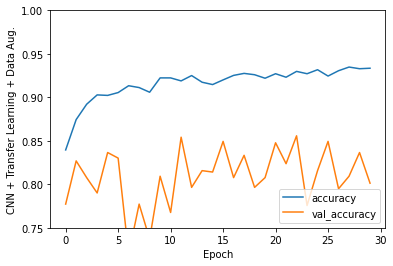

In [ ]:
plt.plot(history3.history['accuracy'], label='accuracy')
plt.plot(history3.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('CNN(TL + DA)')
plt.ylim([0.75, 1])
plt.legend(loc='lower right')